### News Detection using dataset in kaggle

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Reading from the dataset

news_df = pd.read_csv('C:/Users/dell/Downloads/BBC News Train.csv')

In [3]:
news_df.head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [4]:
news_df.isnull().sum()

Text        0
Category    0
dtype: int64

# Exploratory Data Analysis

In [104]:
news_df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

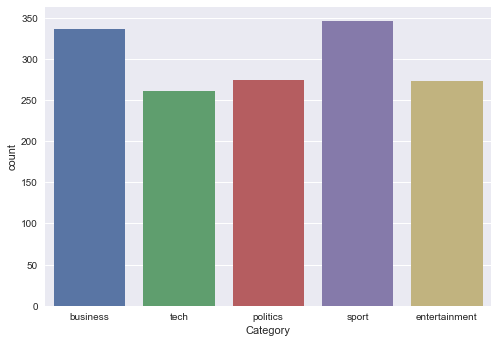

In [103]:
# Let's do some visualization

sns.countplot(x="Category",data= news_df)

The Category feature is almost balanced ans there is no trace of imbalanceness in the categories used in category feature.

## Text Cleaning

I will perform:

* Remove noise
    * Stopwords
    * Removing the special characters
    * Removing punctuations
    * Emojis
    
I will be using the power of NLTK package in nlp for the  text prepossing/cleaning process.


In [5]:
# Lets observe the text

news_df['Text'].head(1)

0    worldcom ex-boss launches defence lawyers defe...
Name: Text, dtype: object

In [6]:
# Importing NLTK library 

##Importing nltk package
import nltk
import re

from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')


nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


from autocorrect import spell


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
stop = stopwords.words('english')
wnl = WordNetLemmatizer()

In [8]:
# Cleaning the text

# Defining a function

def clean_text(message):
    message = re.sub('[^a-zA-Z]',' ',message)
    message = message.lower()
    message = message.split()
    words = [wnl.lemmatize(word) for word in message if word not in stop]
    
    return  " ".join(words)


news_df["clean_text"] = news_df["Text"].apply(clean_text)
news_df.head(n=10)
    

,Text,Category,clean_text
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex bos launch defence lawyer defendin...
1,german business confidence slides german busin...,business,german business confidence slide german busine...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizen majo...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,enron bosses in $168m payout eighteen former e...,business,enron boss payout eighteen former enron direct...
5,howard truanted to play snooker conservative...,politics,howard truanted play snooker conservative lead...
6,wales silent on grand slam talk rhys williams ...,sport,wale silent grand slam talk rhys williams say ...
7,french honour for director parker british film...,entertainment,french honour director parker british film dir...
8,car giant hit by mercedes slump a slump in pro...,business,car giant hit mercedes slump slump profitabili...
9,fockers fuel festive film chart comedy meet th...,entertainment,fockers fuel festive film chart comedy meet fo...


## Keyword Extraction

Extracting the most commonest words class of emotion

In [108]:
from collections import Counter   #The Counter holds the data in an unordered collection, just like hashtable objects. · It allows you to count the items in an iterable list.

In [109]:
# Defining the function that will help to extract keyword

def extract_keywords(text,num = 50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [110]:
news_classes = news_df['Category'].unique().tolist()

news_classes

['business', 'tech', 'politics', 'sport', 'entertainment']

In [111]:
business_list = news_df[news_df['Category'] == 'business']['clean_text'].tolist()
tech_list = news_df[news_df['Category'] == 'tech']['clean_text'].tolist()
politics_list=news_df[news_df['Category'] == 'politics']['clean_text'].tolist()
sport_list =news_df[news_df['Category'] == 'sport']['clean_text'].tolist()
entertainment_list = news_df[news_df['Category'] == 'entertainment']['clean_text'].tolist()

In [112]:
business_docx = joy_docx = ' '.join(business_list)

tech_docx =joy_docx = ' '.join(tech_list)

politics_docx =joy_docx = ' '.join(politics_list)

sport_docx =joy_docx = ' '.join(sport_list)

entertainment_docx =joy_docx = ' '.join(entertainment_list)


In [26]:
## Extracting keywords

keyword_business = extract_keywords(business_docx)
keyword_tech = extract_keywords(tech_docx)
keyword_politics = extract_keywords(politics_docx)
keyword_sport = extract_keywords(sport_docx)
keyword_entertainment = extract_keywords(entertainment_docx)

In [27]:
## plot

def plot_words(mydict,news_class):
    df_01 = pd.DataFrame(mydict.items(),columns = ['token','count'])
    plt.figure(figsize = (20,10))
    plt.title('Plot of {}'.format(news_class))
    sns.barplot(x ='token',y ='count',data = df_01)
    plt.xticks(rotation = 45)
    plt.show()

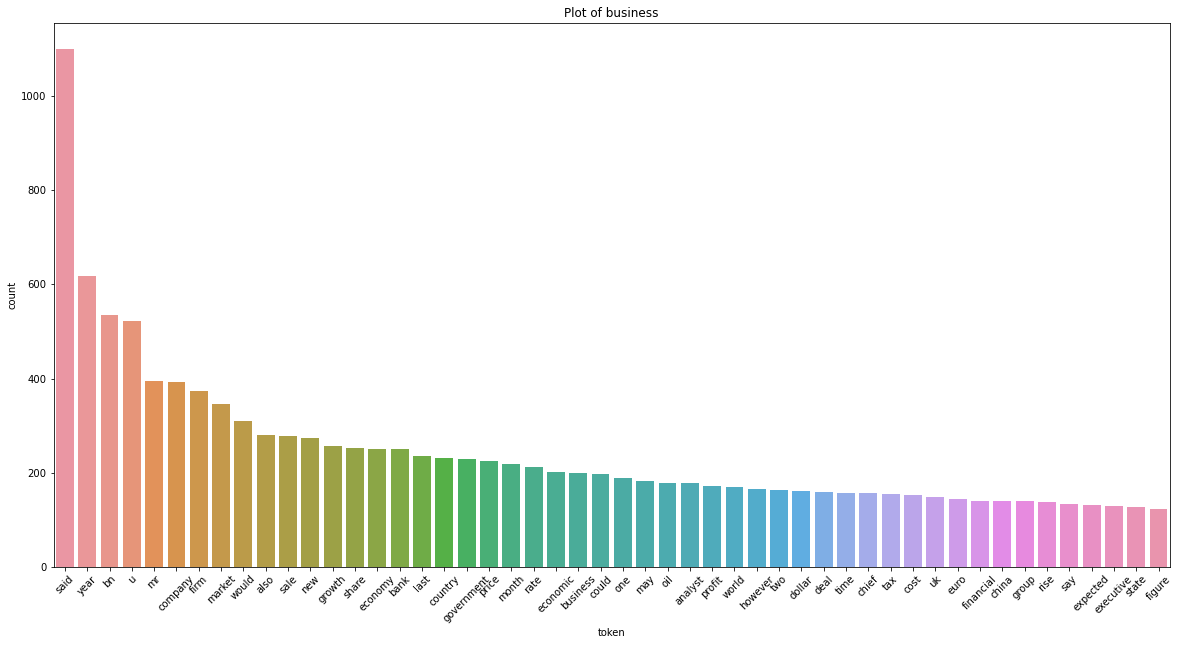

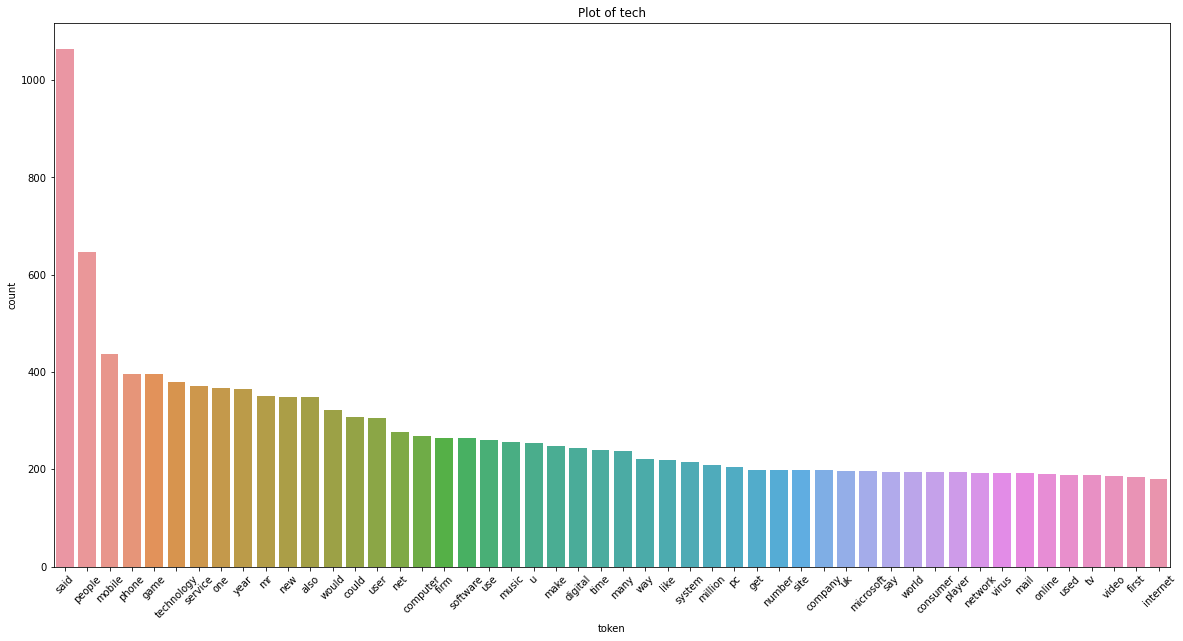

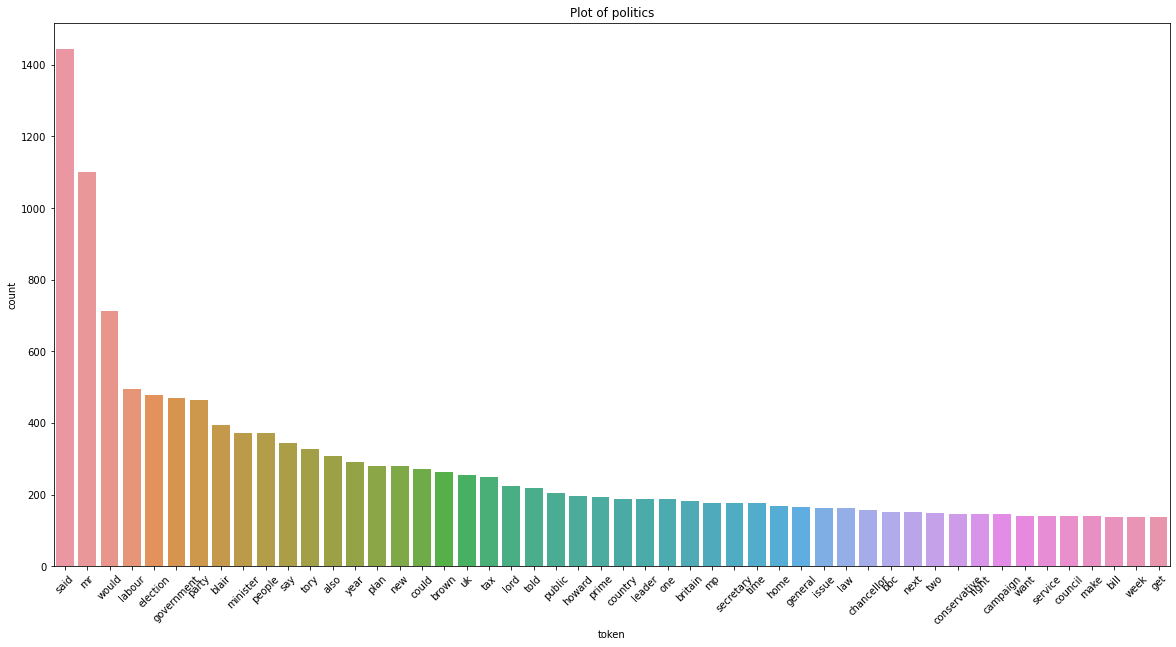

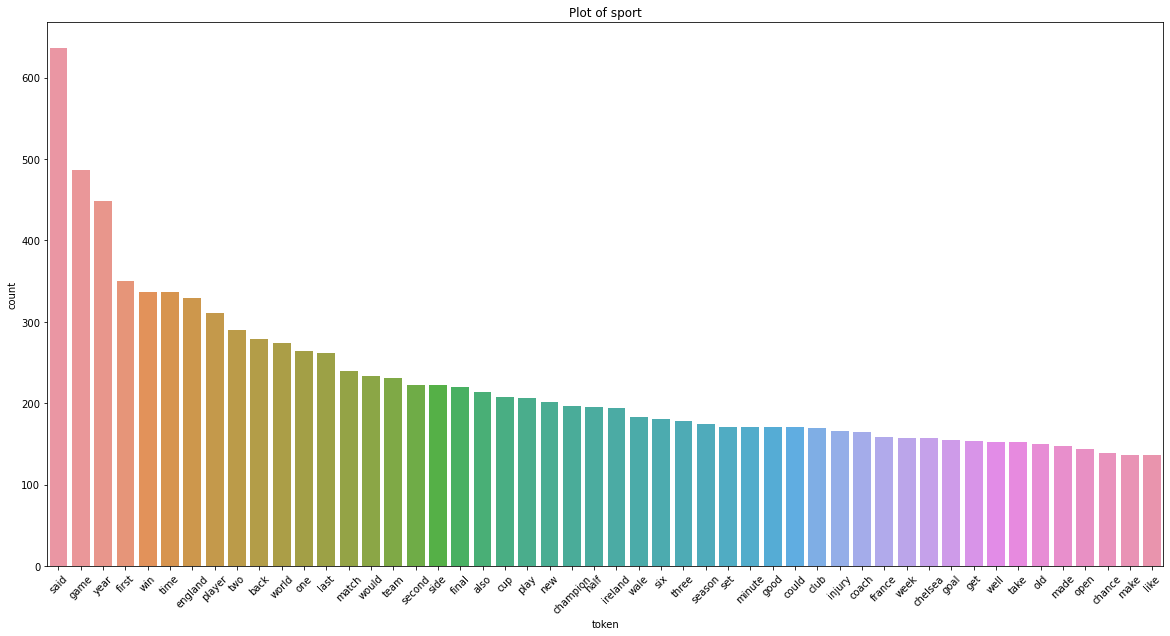

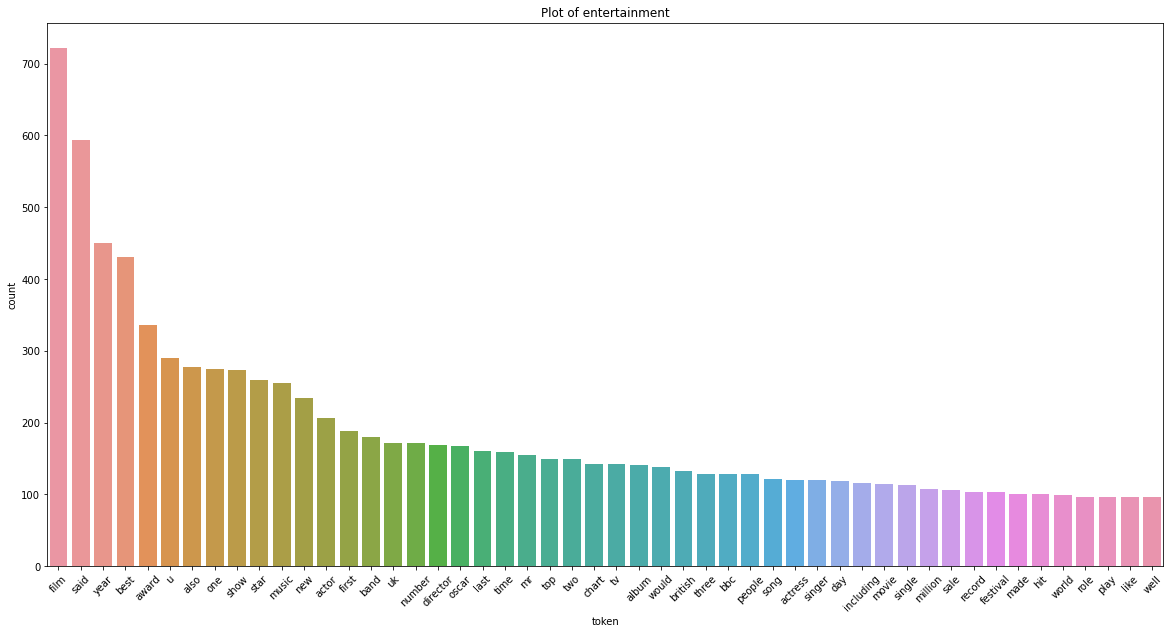

In [30]:
plot_words(keyword_business,"business")
plot_words(keyword_tech,"tech")
plot_words(keyword_politics,"politics")
plot_words(keyword_sport,"sport")
plot_words(keyword_entertainment,"entertainment")

In [31]:
## Representing in wordcloud

from wordcloud import WordCloud


In [32]:
def plot_wordcloud(doc):
    mywordcloud = WordCloud().generate(doc)
    plt.figure(figsize = (20,10))
    plt.imshow(mywordcloud,interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

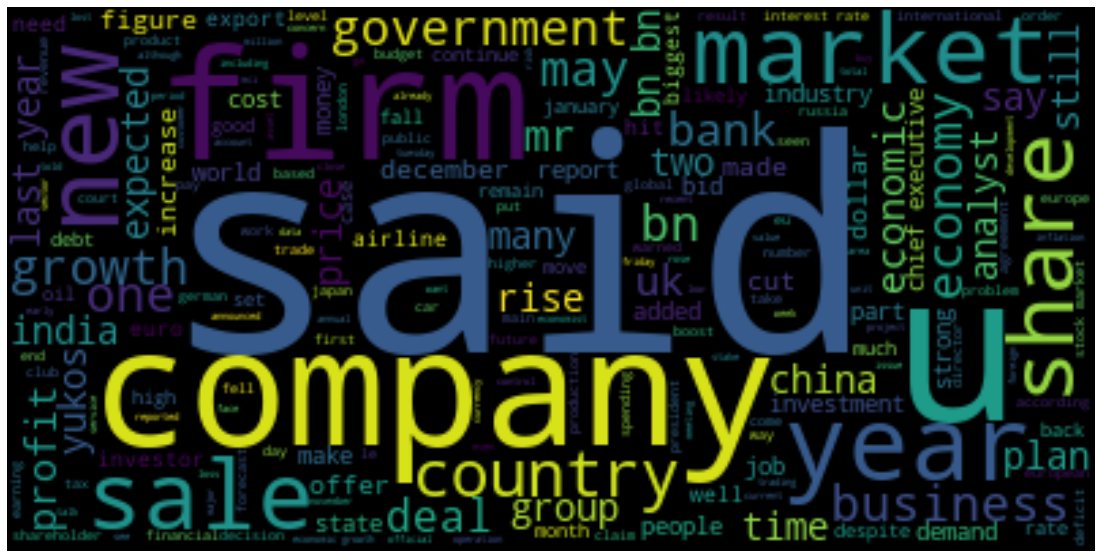

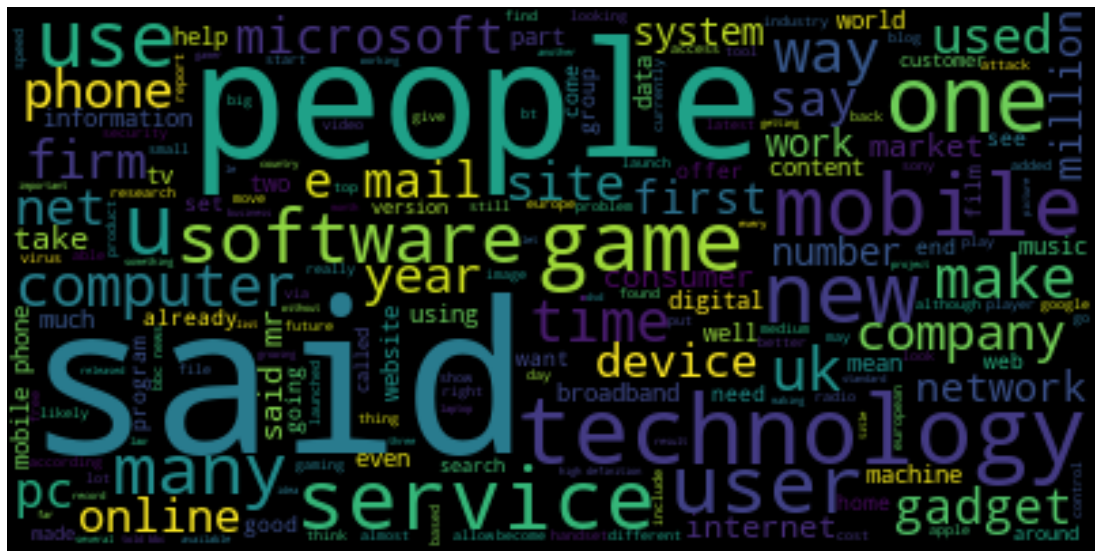

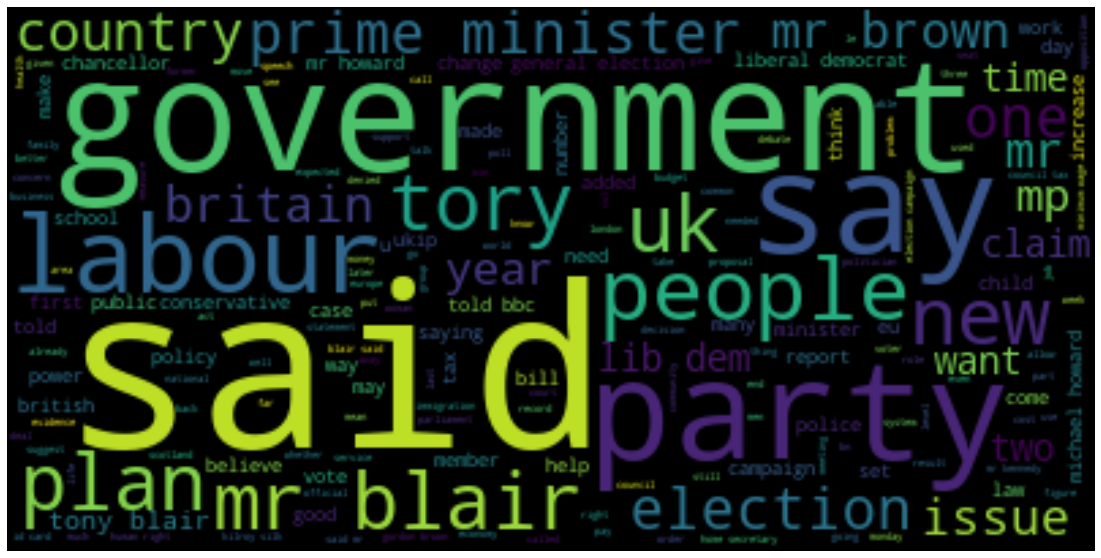

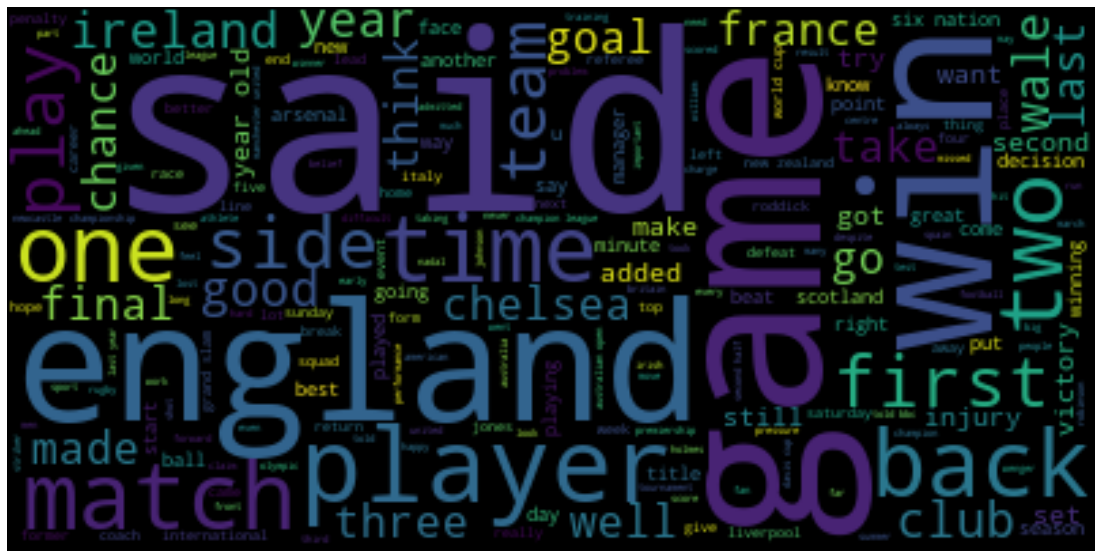

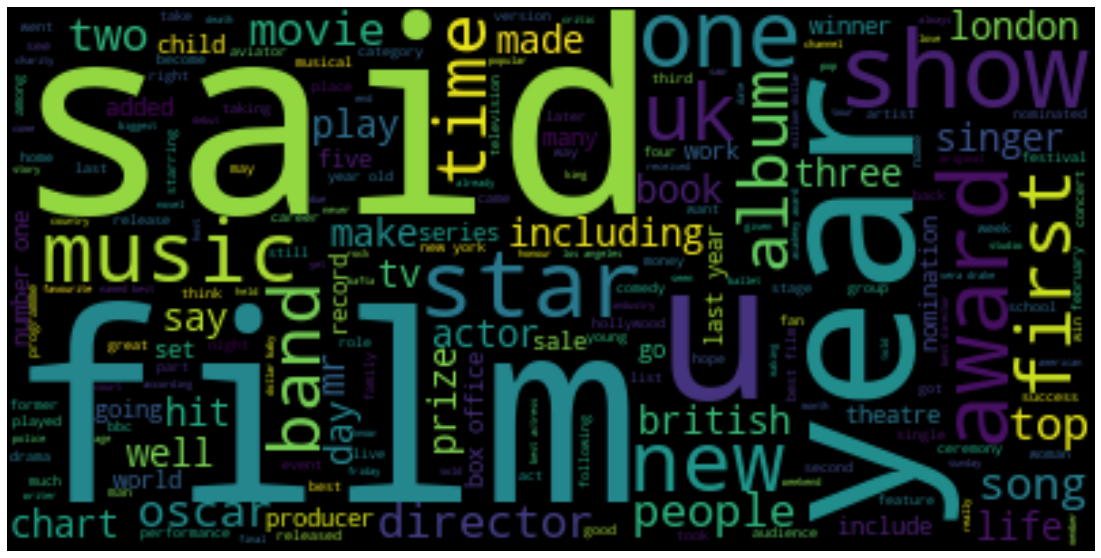

In [33]:
plot_wordcloud(business_docx)
plot_wordcloud(tech_docx)
plot_wordcloud(politics_docx)
plot_wordcloud(sport_docx)
plot_wordcloud(entertainment_docx)

## Feature Engineering

In [9]:
# let's first create x and y

X = news_df['clean_text']
y = news_df['Category']

In [10]:
# Vectorizing the text using TFidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [11]:
# Implementing the vectorizer

vectorization = TfidfVectorizer(binary = False,use_idf = True)
xv_train = vectorization.fit_transform(X)
#xv_test = vectorization.transfrom(X_test)

In [12]:
## Label encoding the y field

from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()



In [13]:
# Assigning numerical values and storing in another column
news_df['encoded_y'] = labelencoder.fit_transform(y)


In [14]:
news_df.head()

,Text,Category,clean_text,encoded_y
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex bos launch defence lawyer defendin...,0
1,german business confidence slides german busin...,business,german business confidence slide german busine...,0
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizen majo...,0
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...,4
4,enron bosses in $168m payout eighteen former e...,business,enron boss payout eighteen former enron direct...,0


In [15]:
news_df.loc[news_df['encoded_y'] == 0, 'Category'].head()
news_df.loc[news_df['encoded_y'] == 1, 'Category'].head()
news_df.loc[news_df['encoded_y'] == 2, 'Category'].head()
news_df.loc[news_df['encoded_y'] == 3, 'Category'].head()
news_df.loc[news_df['encoded_y'] == 4, 'Category'].head()

3     tech
19    tech
24    tech
26    tech
30    tech
Name: Category, dtype: object

0 - Business
1 - entertainment
2 - politics
3 - sport
4 - tech

In [16]:
y1 = news_df['encoded_y']

In [17]:
# Importing necessary libraries

from sklearn.model_selection import train_test_split

# Splitting the data

X_train,X_test,y_train,y_test = train_test_split(xv_train,y1,test_size = 0.3,random_state = 42)

In [18]:
X_train.shape,y_train.shape

((1043, 20830), (1043,))

In [19]:
X_test.shape

(447, 20830)

## Building a model

In [26]:
## We will Decision tree for classification

# Importing libraries

from sklearn.tree import DecisionTreeClassifier



In [27]:
Dt = DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
## Checking the accuracy

Dt.score(X_test,y_test)

0.7874720357941835

In [29]:
predict_news = Dt.predict(X_test)

In [30]:
## Building classification report

from sklearn.metrics import classification_report

CR = classification_report(y_test,predict_news)
print(CR)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       108
           1       0.82      0.76      0.79        79
           2       0.66      0.76      0.71        86
           3       0.82      0.89      0.85       101
           4       0.86      0.81      0.83        73

    accuracy                           0.79       447
   macro avg       0.79      0.79      0.79       447
weighted avg       0.79      0.79      0.79       447



In [31]:
## Building a confusion metric

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test,predict_news)
print(cm)
accuracy_score(y_test,predict_news)

[[78  5 19  4  2]
 [ 4 60  7  7  1]
 [ 7  4 65  6  4]
 [ 4  1  3 90  3]
 [ 4  3  4  3 59]]


0.7874720357941835

<AxesSubplot:>

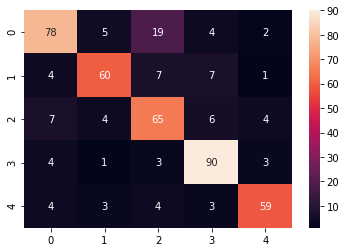

In [32]:
sns.heatmap(cm, annot=True)


In [36]:
## Using Multinomial naive bayes to for model building

from sklearn.naive_bayes import MultinomialNB

naiveModel = MultinomialNB()

naiveModel.fit(X_train,y_train)

MultinomialNB()

In [37]:
naiveModel.score(X_test,y_test)

0.9664429530201343

In [38]:
predict_news1 = naiveModel.predict(X_test)

In [39]:
predict_proba_news1 = naiveModel.predict_proba(X_test)
predict_proba_news1[9]

array([0.06153153, 0.02914557, 0.03637992, 0.04096471, 0.83197827])

In [40]:
cm1 = confusion_matrix(y_test,predict_news1)
print(cm1)
accuracy_score(y_test,predict_news1)


[[105   0   1   0   2]
 [  1  76   1   1   0]
 [  2   0  81   1   2]
 [  0   0   0 101   0]
 [  0   0   3   1  69]]


0.9664429530201343

<AxesSubplot:>

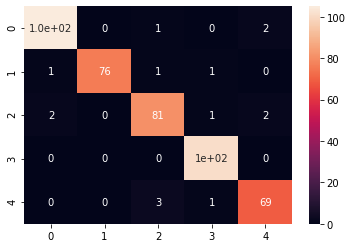

In [41]:
sns.heatmap(cm1, annot=True)


In [42]:
from sklearn.metrics import classification_report

CR = classification_report(y_test,predict_news)
print(CR)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       108
           1       0.82      0.76      0.79        79
           2       0.66      0.76      0.71        86
           3       0.82      0.89      0.85       101
           4       0.86      0.81      0.83        73

    accuracy                           0.79       447
   macro avg       0.79      0.79      0.79       447
weighted avg       0.79      0.79      0.79       447



## ROC-AUC calculation

In [43]:
import sklearn

sklearn.__version__

'0.24.1'

In [44]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,predict_proba_news1,multi_class = 'ovo')

0.9990891674478084

## ROC Curve

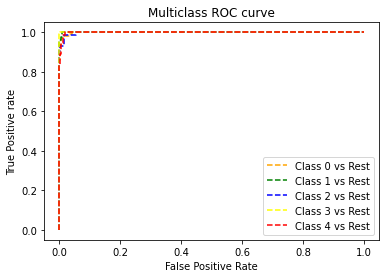

In [46]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, predict_proba_news1[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

## Let's make some prediction




In [93]:
## Defining a function that will predict the certain type of the news.

def predict_news(text,model):
    myvect = vectorization.transform(text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba))
    print(prediction)
    return pred_percentage_for_all



In [95]:
predict_news(['It is believed that millions of cybercrime occurs everyyear in the east coast of virginia due to these crime the government is passing laws and making reforms on better computer security.'],Dt)

[2]


{0: array([0., 0., 1., 0., 0.])}